# Finance 1: Portfolio Optimization

#### By Carlos Santillán

#### February 2022

## What is Portfolio Optimization?

Portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.

## What are assets, returns and risk?


Assets include, but are not limited to:

- Bonds
- Stocks
- Cash
- Real Estate

Usually when you build a portfolio, it is advisable to diversify your assets, or purchase different kinds of assets from different companies. For all assets, you will get a profit after a specified period of time. However, the profit may not be the same for each investment you make.

This profit is what we call returns.

For example, you will get returns from stocks when it’s market value goes up and similarly you will get returns from cash in form of interest.

But what if the company whose stocks you have purchased goes bankrupt?

This will lead to its stocks crashing in the share market and instead of gaining profits, you will also lose your capital investment.

This is what is called **risk of investment**.

Another aspect of risk is the fluctuations in the asset value. For certain assets, its value is highly volatile, that is, the value increases when the market goes up, and drops accordingly. Whereas certain other assets, like bonds and certain steady stocks, are relatively more resistant to market conditions, but may give lesser returns compared to high risk ones.

A good portfolio is one which gives us **maximum return on our investment for minimum risk**, as discussed earlier.

## Modern Portfolio Theory (MTP)

**Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level**.

It was formulated by H. Markowitz and while it is not the only optimization technique known, it is the most widely used.

MPT assumes that all investors are risk-averse, i.e, if there is a choice between low risk and high risk portfolios with the same returns, an investor will choose one with the low risk.

So, what is the MPT all about?

MPT encourages diversification of assets. It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.

## What is the Efficient Frontier?

We know every asset in a portfolio has its own rate expected returns and risks. It is possible to create multiple combinations of assets that can provide high returns for a pre-defined risk level.

Likewise, there can be multiple portfolios that give lowest risk for a pre-defined expected return.

**Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis**. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

## Fundamentals in Portfolio Optimization

### Stock Price Data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2021.

In [23]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
!pip install yfinance

In [25]:
import yfinance as yf

In [26]:
test = yf.download('BLK FB', start='2018-01-01', end='2021-12-31')
test.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close  ...        Open  Volume          
                   BLK          FB         BLK  ...          FB     BLK        FB
Date                                            ...                              
2018-01-02  460.668701  181.419998  508.970001  ...  177.679993  526400  18151900
2018-01-03  465.529175  184.669998  514.340027  ...  181.880005  448700  16886600
2018-01-04  471.674744  184.330002  521.130005  ...  184.899994  389800  13880900
2018-01-05  475.693390  186.850006  525.570007  ...  185.589996  483000  13574500
2018-01-08  479.241364  188.279999  529.489990  ...  187.199997  561500  17994700

[5 rows x 12 columns]

As you can see, there are a lot of different columns for different prices throughout the day, but we will only focus on the ‘Adj Close’ column. This colum gives us the closing price of company’s stock on the given day.

In [27]:
test = test['Adj Close']
test.tail()

,BLK,FB
Date,,
2021-12-23,913.919983,335.239990
2021-12-27,922.570007,346.179993
2021-12-28,921.820007,346.220001
2021-12-29,909.719971,342.940002
2021-12-30,913.760010,344.359985


### Calculate percentage change in Stock Prices

Next, we calculate the percentage change in stock prices everyday. You will notice that that we take the log of percentage change.

But take log?

The reason for this is that log of the returns is time additive.

That is,
If 

- $r_{13}$ is the returns for time between $t_{3}$ and $t_{1}$.
- $r_{12}$ is the returns between $t_{1}$ and $t_{2}$ and
- $r_{23}$ is the returns between $t_{2}$ and $t_{3}$.

Then, $log(r_{13}) = log(r_{12}) + log(r_{23})$

For example:

In [28]:
p1 = 100 
p2 = 110 
p3 = 120

Then:

In [29]:
print("log(r12) = " + str(np.log(p2/p1) * 100) + "%")
print("log(r23) = " + str(np.log(p3/p2) * 100) + "%")
print("log(r13) = " + str((np.log(p2/p1) +np.log(p3/p2))* 100) + "%")
print("log(120/100) = " + str(np.log(p3/p1) * 100) + "%")

log(r12) = 9.531017980432493%
log(r23) = 8.70113769896297%
log(r13) = 18.23215567939546%
log(120/100) = 18.232155679395458%


This means a log change of +0.1 today and then -0.1 tomorrow will give you the same value of stock as yesterday. This is not true if you simply compute percentage change.

It is common practice in portfolio optimization to take log of returns for calculations of covariance and correlation.

In [30]:
# Log of percentage change
blk = test['BLK'].pct_change().apply(lambda x: np.log(1+x))
blk.head()

Date
2018-01-02         NaN
2018-01-03    0.010496
2018-01-04    0.013115
2018-01-05    0.008484
2018-01-08    0.007431
Name: BLK, dtype: float64

### Variance

The variance in prices of stocks of Tesla are an important indicator of how volatile this investment will be (how returns can fluctuate).

It can be calculated for each company by using built in .var() function. Under the hood, the formula implemented by this function is given by:

$$s^{2}= \frac{\Sigma^{N}_{i=1}(x_{i}-\bar{x})^{2}}{(N-1)}$$

In [31]:
# Variance
var_blk = blk.var()
var_blk

0.00039176517361827094

We do the same for Facebook:

In [33]:
fb = test['FB'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

Date
2018-01-02         NaN
2018-01-03    0.017756
2018-01-04   -0.001843
2018-01-05    0.013579
2018-01-08    0.007624
Name: FB, dtype: float64

In [34]:
var_fb = fb.var()
var_fb

0.0005250622680934013

### Volatility

Volatility is measured as the standard deviation of a company’s stock.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of variance:

$$s= \sqrt{\frac{\Sigma^{N}_{i=1}(x_{i}-\bar{x})^{2}}{(N-1)}}$$

But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

250 is used because there are 250 trading days in a year.

In [35]:
# Volatility
blk_vol = np.sqrt(var_blk * 250)
fb_vol = np.sqrt(var_fb * 250)
blk_vol, fb_vol

(0.3129557371331731, 0.36230590255107675)

We can plot the volatility for a better visualization:

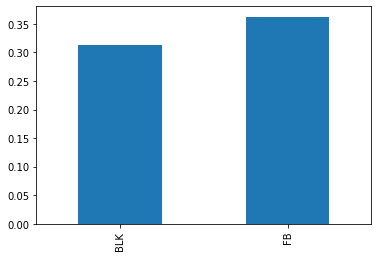

In [36]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

### Covariance

**Covariance measures the directional relationship between the returns on two assets**.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

We can calculate the covariance of BlackRock and Facebook by using the .cov() function:

In [37]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

,BLK,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.010496,0.017756
2018-01-04,0.013115,-0.001843
2018-01-05,0.008484,0.013579
2018-01-08,0.007431,0.007624


In [38]:
# Covariance
test1['BLK'].cov(test1['FB'])

0.00021811109939724112

We can appreciate a very small positive covariance between BlackRock and Facebook

### Correlation

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

You can think of correlation as a scaled version of covariance, where the values are restricted to lie between -1 and +1.

A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

This is calculated using the .corr() function.

In [39]:
test1['BLK'].corr(test1['FB'])

0.48090517283272444

We can see correlation between BlackRock and Facebook is also positive and a bit high

### Expected Returns

Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise, as you will see further.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques we will discuss later but for now we will consider random weights for BlackRock and Facebook.

In [40]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

,BLK,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.010496,0.017756
2018-01-04,0.013115,-0.001843
2018-01-05,0.008484,0.013579
2018-01-08,0.007431,0.007624


#### Weights

Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these two stocks. They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation)

In [41]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

BLK    0.000681
FB     0.000637
dtype: float64

The total expected return for a portfolio is given by:

$$E[R_{p}] = w_{1}E[R_{1}] + w_{2}E[R_{2}] + ... + w_{n}E[R_{n}]$$

Thus, e_r, or total expected return can be calculated as:

In [42]:
e_r = (e_r_ind * w).sum()
e_r

0.0006458012028127541

### Building an Optimal Risk Portfolio

Now that you have gone through the building blocks of portfolio optimization, it is time to create an optimal portfolio using the same concepts.

We will be using stocks from 4 companies, namely, Apple, BlackRock, Google and Amazon for a period of 5 years.

You will learn to calculate the weights of assets for each one. Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio.

In [43]:
df = yf.download('AAPL BLK GOOG AMZN', start='2017-01-01', end='2021-12-31')
df.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                          ...   Volume                 
                 AAPL        AMZN         BLK  ...     AMZN     BLK     GOOG
Date                                           ...                          
2017-01-03  27.297691  753.669983  341.648804  ...  3521100  743900  1657300
2017-01-04  27.267132  757.179993  341.852203  ...  2510500  680800  1073000
2017-01-05  27.405802  780.450012  338.209686  ...  5830100  468400  1335200
2017-01-06  27.711330  795.989990  339.765747  ...  5986200  453400  1640200
2017-01-09  27.965149  796.919983  336.335327  ...  3446100  505300  1274600

[5 rows x 24 columns]

Just like earlier, we will only keep the ‘Adj Close’ column to perform our calculations:

In [44]:
df = df['Adj Close']
df.head()

,AAPL,AMZN,BLK,GOOG
Date,,,,
2017-01-03,27.297691,753.669983,341.648804,786.140015
2017-01-04,27.267132,757.179993,341.852203,786.900024
2017-01-05,27.405802,780.450012,338.209686,794.020020
2017-01-06,27.711330,795.989990,339.765747,806.150024
2017-01-09,27.965149,796.919983,336.335327,806.650024


#### Covariance and Correlation matrices

In [45]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AAPL,AMZN,BLK,GOOG
AAPL,0.000369,0.000226,0.000193,0.000217
AMZN,0.000226,0.000342,0.000145,0.000211
BLK,0.000193,0.000145,0.000329,0.000183
GOOG,0.000217,0.000211,0.000183,0.000290


The covariance between Apple and Apple, or BlackRock and BlackRock is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.

- A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

- A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

- A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [46]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,AAPL,AMZN,BLK,GOOG
AAPL,1.000000,0.636225,0.553696,0.663826
AMZN,0.636225,1.000000,0.430963,0.670383
BLK,0.553696,0.430963,1.000000,0.591536
GOOG,0.663826,0.670383,0.591536,1.000000


#### Portfolio Variance

The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:

$$\sigma^2(R_{p}) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

Here, $w_i$ and $w_j$ denote weights of all assets from 1 to n (in our case from 1 to 4) and $COV(R_i, R_j)$ is the covariance of the two assets denoted by $i$ and $j$.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

In [47]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'BLK': 0.2, 'GOOG': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00023168370690434734

Thus we have found the portfolio variance. But for truly optimizing the portfolio, we cant plug in random weights. We will need to calculate it according to what gives us maximum expected returns.

#### Portfolio Expected Returns

The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the *resample()* function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [48]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

AAPL    0.502501
AMZN    0.328190
BLK     0.216518
GOOG    0.314458
dtype: float64

And our portfolio returns will be:

In [49]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.28703835849728876

### Plotting the Efficient Frontier

This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.

But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [50]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

AAPL    0.303666
AMZN    0.292500
BLK     0.286843
GOOG    0.269054
dtype: float64

In [51]:
assets = pd.concat([ind_er, ann_sd], axis=1) ## Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.502501,0.303666
AMZN,0.328190,0.292500
BLK,0.216518,0.286843
GOOG,0.314458,0.269054


We can see that in this case, Apple has the maximum risk (volatility) but also the highest of returns. The lowest risk is presented by Google, and has an average return within our portfolio.

Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.

In [52]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [53]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [54]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,BLK weight,GOOG weight
0,0.352378,0.245131,0.346753,0.027954,0.282498,0.342795
1,0.306374,0.237198,0.095898,0.301360,0.308914,0.293827
2,0.293199,0.243758,0.063530,0.032495,0.343591,0.560384
3,0.303165,0.240452,0.169009,0.130140,0.458046,0.242805
4,0.342915,0.241395,0.216278,0.270366,0.162600,0.350755


You can see that there are a number of portfolios with different weights, returns and volatility. Plotting the returns and volatility from this dataframe will give us the efficient frontier for our portfolio.

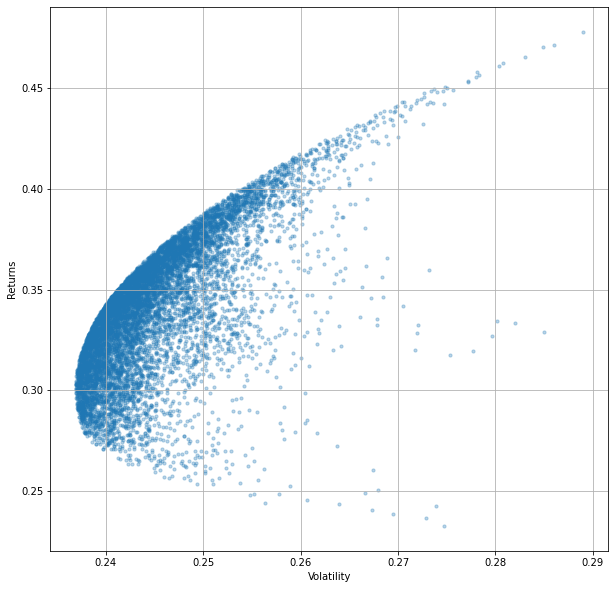

In [55]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### How to read the Efficient Frontier

Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)

2. Maximum returns (top most point)

And everything in between.

In [56]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.300399
Volatility     0.236923
AAPL weight    0.088230
AMZN weight    0.263108
BLK weight     0.349838
GOOG weight    0.298825
Name: 485, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Amazon, BlackRock and Google are 8%, 26%, 34% and 29% respectively. This point can be plotted on the efficient frontier graph as shown:

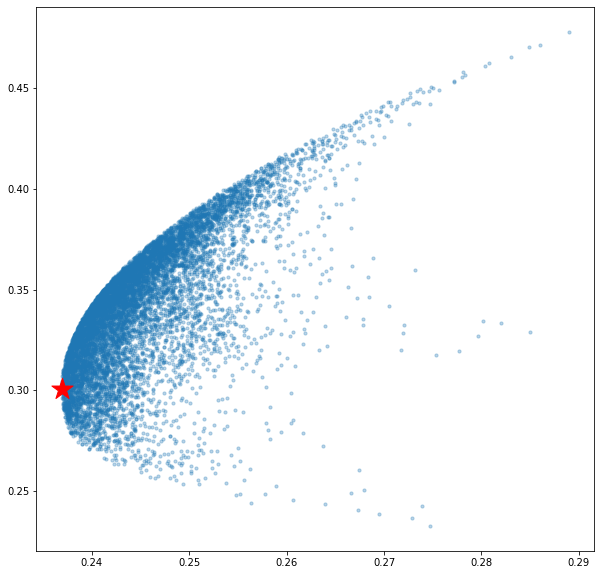

In [57]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)


It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?

This is done by using a parameter called the **Sharpe Ratio**.

### Sharpe Ratio

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

$$Sharpe \; Ratio = \frac{R_{p}-R_f}{\sigma_p}$$

where:

- $R_p$ is the return of the portfolio

- $R_f$ is the risk-free rate

- $\sigma_p$ is the standard deviation of the portfolio

Below is the code for finding out portfolio with maximum Sharpe Ratio. This portfolio is the optimized portfolio that we wanted to find. We define the risk-free rate to be 7.8% or 0.078.

### Optimal Risky Portfolio

An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

In [58]:
# Finding the optimal portfolio
rf = 0.078 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.478083
Volatility     0.288992
AAPL weight    0.877420
AMZN weight    0.001323
BLK weight     0.014148
GOOG weight    0.107109
Name: 7776, dtype: float64

You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 5%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.

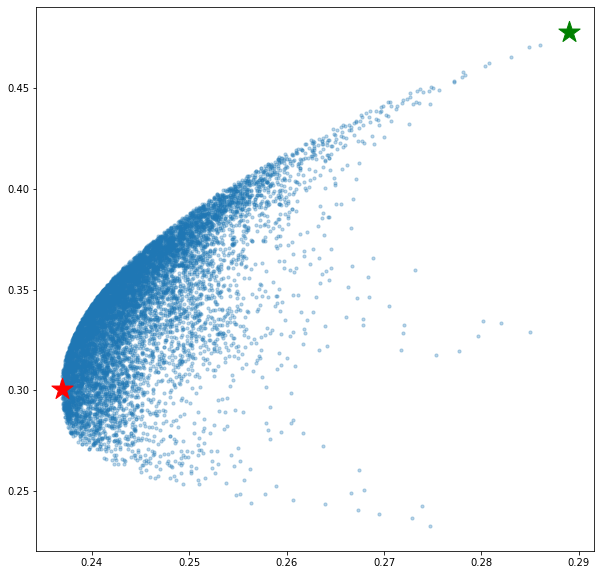

In [59]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)